In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [217]:
df = pd.read_csv('Train_Data.csv')
test = pd.read_csv('Test_Data.csv')
df.head()

,White King file,White King rank,White Rook file,White Rook rank,Black King file,Black King rank,optimal depth-of-win
0,d,3,f,5,a,5,nine
1,d,3,e,5,f,2,eight
2,d,1,g,6,d,7,thirteen
3,c,2,e,8,a,4,ten
4,d,4,a,8,b,1,eight


In [56]:
test.head()

,White King file,White King rank,White Rook file,White Rook rank,Black King file,Black King rank
0,d,1,e,3,g,5
1,b,1,f,7,f,3
2,d,2,d,4,e,7
3,c,2,g,5,f,5
4,b,1,e,4,b,8


In [3]:
df.shape

(21041, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21041 entries, 0 to 21040
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   White King file       21041 non-null  object
 1   White King rank       21041 non-null  int64 
 2   White Rook file       21041 non-null  object
 3   White Rook rank       21041 non-null  int64 
 4   Black King file       21041 non-null  object
 5   Black King rank       21041 non-null  int64 
 6   optimal depth-of-win  21041 non-null  object
dtypes: int64(3), object(4)
memory usage: 1.1+ MB


In [5]:
df.nunique()

White King file          4
White King rank          4
White Rook file          8
White Rook rank          8
Black King file          8
Black King rank          8
optimal depth-of-win    18
dtype: int64

In [26]:
df.sample(10)

,White King file,White King rank,White Rook file,White Rook rank,Black King file,Black King rank,optimal depth-of-win
8821,d,3,f,1,g,5,ten
864,d,3,h,8,g,8,draw
2054,b,1,c,6,e,3,sixteen
205,d,2,b,6,c,6,draw
10059,b,1,g,6,g,8,thirteen
19451,b,1,c,4,e,1,twelve
9571,a,1,f,4,h,7,thirteen
3506,d,3,h,8,d,1,two
15627,c,3,h,5,b,1,two
11778,d,1,c,2,f,1,four


In [27]:
categorical = df.select_dtypes(include='object')
numerical = df.select_dtypes(exclude='object')

In [37]:
def plot_categorical(df):
    for i in df:
        ax,fig = plt.subplots(1,figsize=(20,10))
        ax = sns.countplot(x=df[i],order=df[i].value_counts().index)

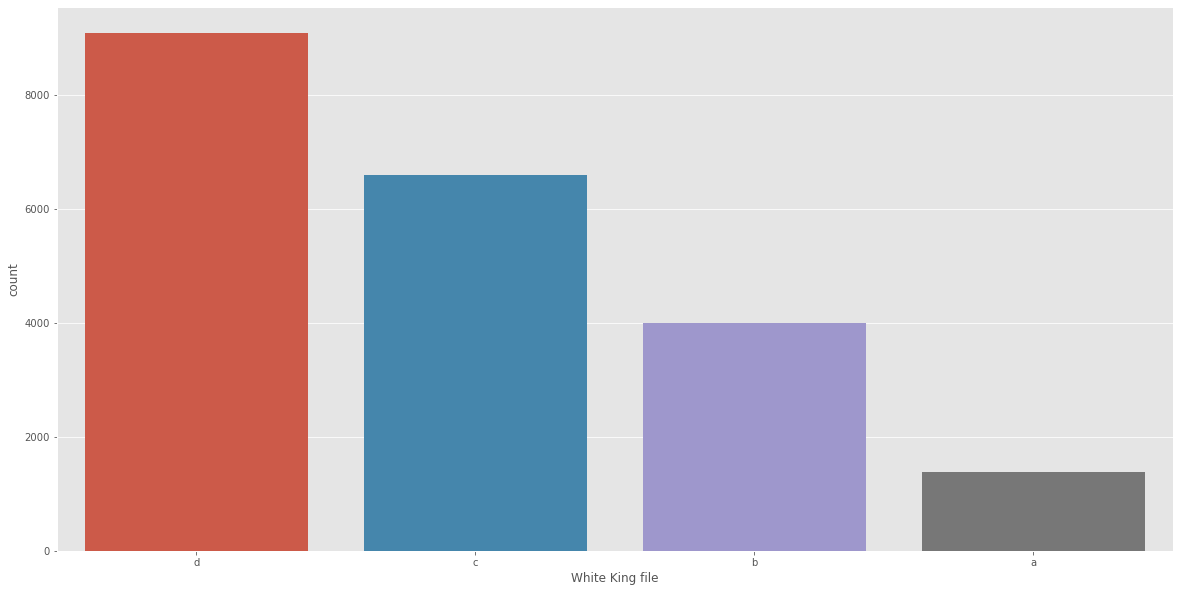

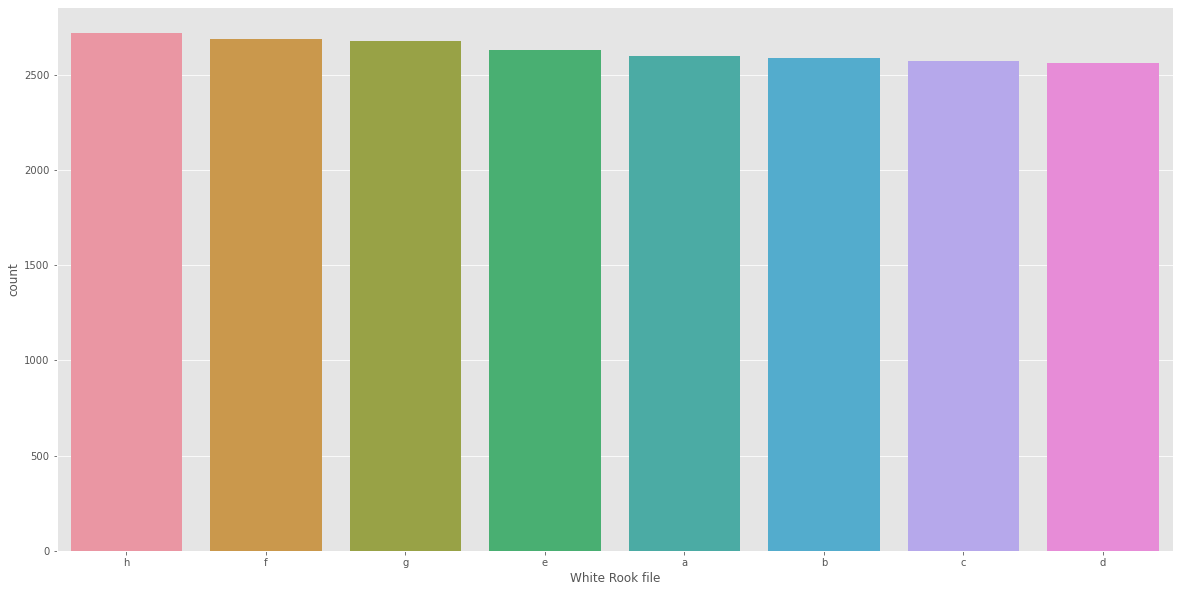

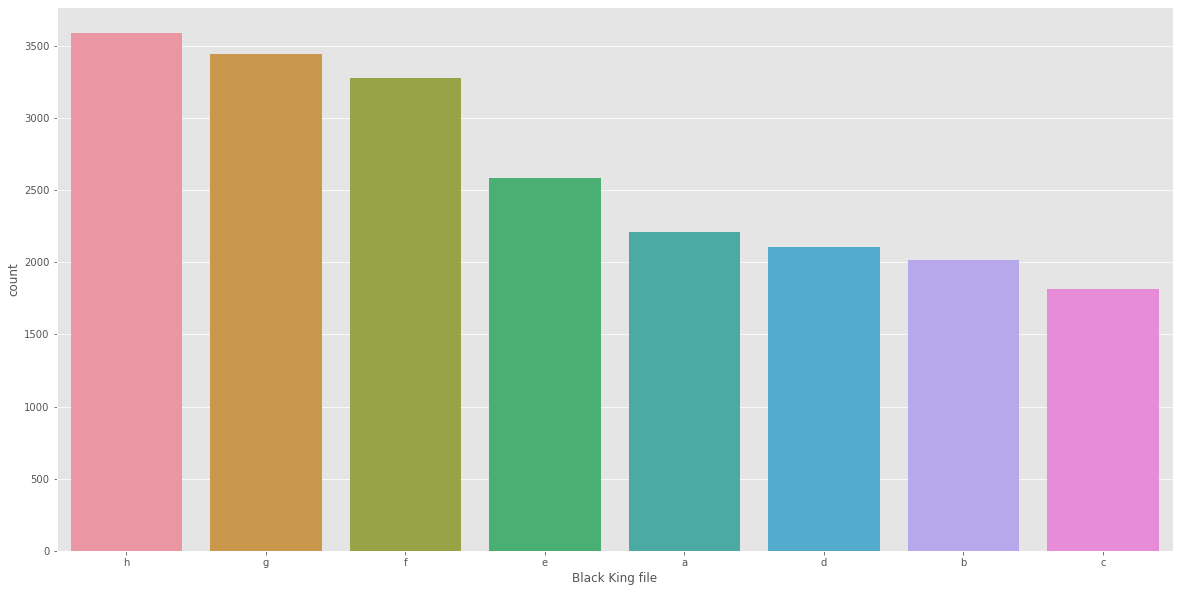

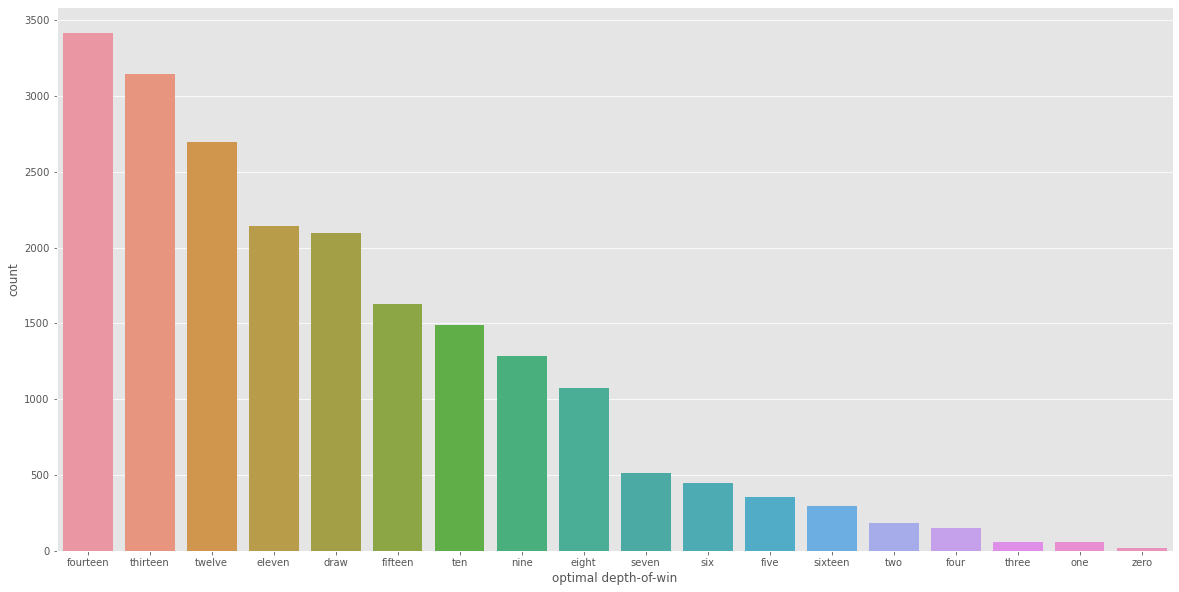

In [38]:
plot_categorical(categorical)

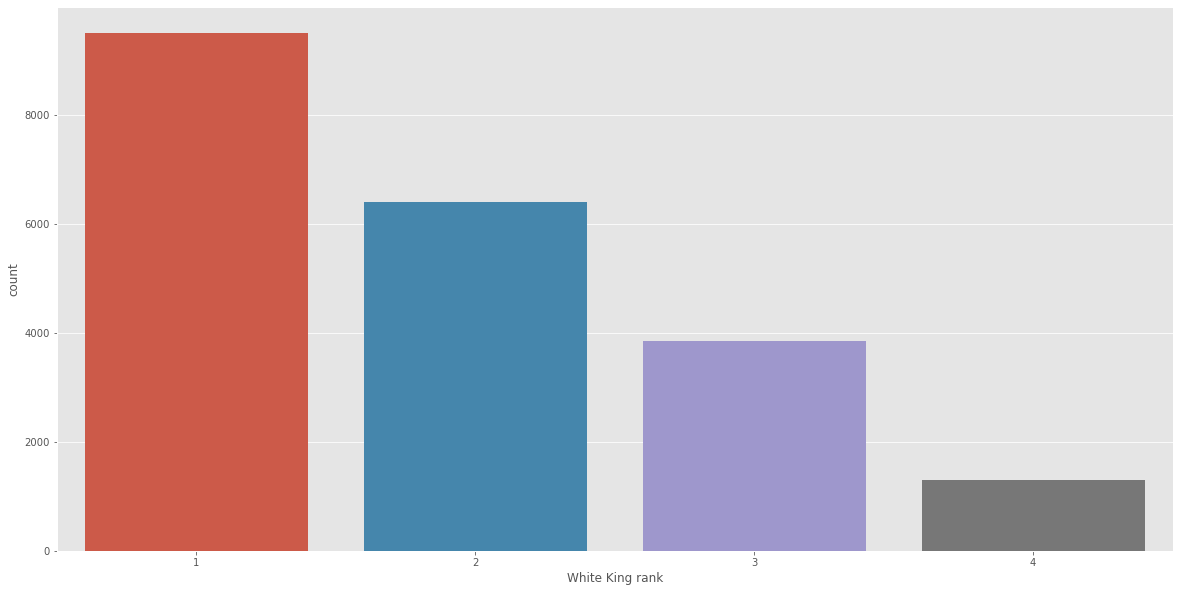

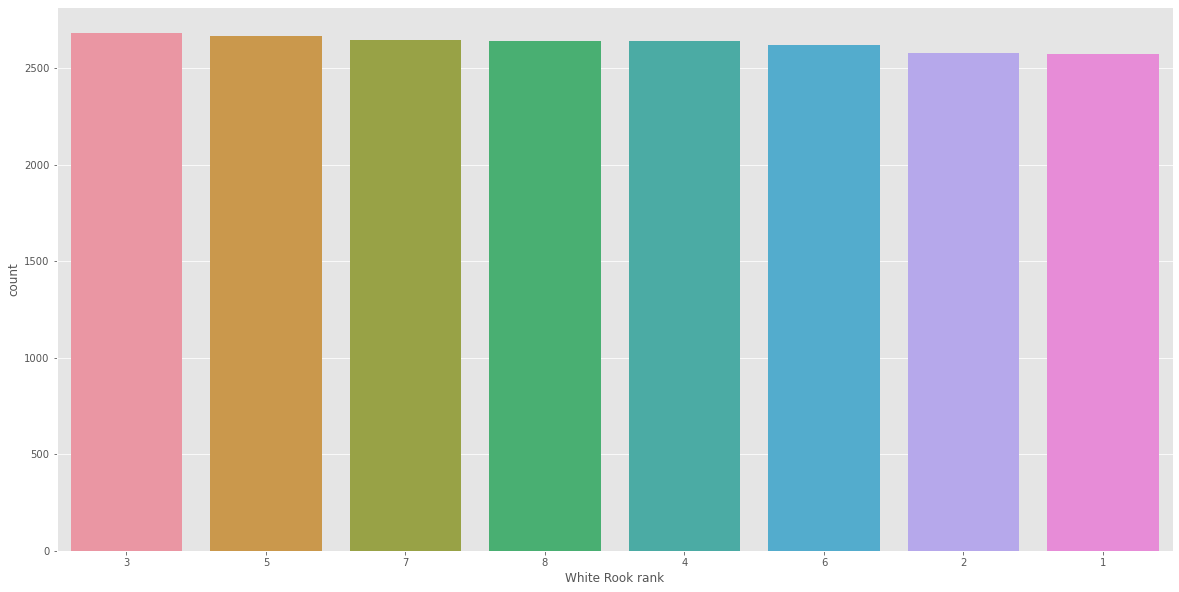

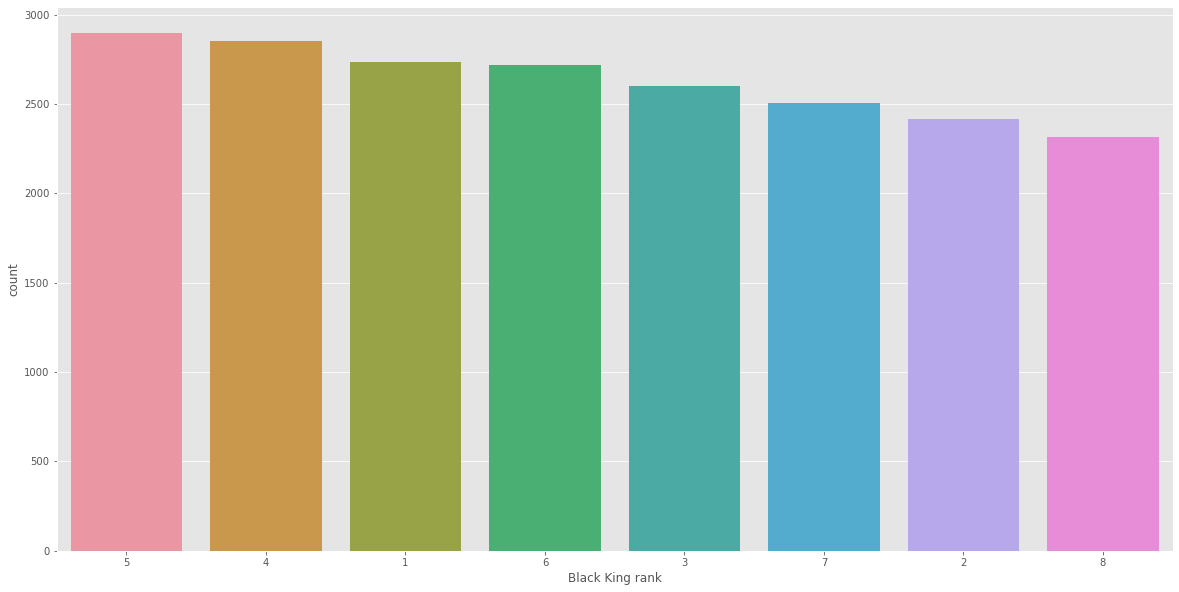

In [39]:
plot_categorical(numerical)

In [50]:
df.head()

,White King file,White King rank,White Rook file,White Rook rank,Black King file,Black King rank,optimal depth-of-win
0,d,3,f,5,a,5,nine
1,d,3,e,5,f,2,eight
2,d,1,g,6,d,7,thirteen
3,c,2,e,8,a,4,ten
4,d,4,a,8,b,1,eight


In [218]:
df['White King file'].unique()

array(['d', 'c', 'a', 'b'], dtype=object)

In [150]:
test['White King file'].unique()

array(['d', 'b', 'c', 'a'], dtype=object)

In [152]:
test.isnull().sum()

White King file    0
White King rank    0
White Rook file    0
White Rook rank    0
Black King file    0
Black King rank    0
dtype: int64

In [219]:
from sklearn.preprocessing import LabelEncoder
categorical_features = ['White King file','White Rook file','Black King file']

# make an encoder object
encoder = LabelEncoder()

# fit and transform feature x2
for col in categorical_features:
    encoder.fit(pd.concat([df[col], test[col]], axis=0, sort=False))
    df[col] = encoder.transform(df[col])
    test[col] = encoder.transform(test[col])

In [220]:
encode = LabelEncoder()
df['optimal depth-of-win'] = encode.fit_transform(df['optimal depth-of-win'])

In [221]:
df.head()

,White King file,White King rank,White Rook file,White Rook rank,Black King file,Black King rank,optimal depth-of-win
0,3,3,5,5,0,5,7
1,3,3,4,5,5,2,1
2,3,1,6,6,3,7,13
3,2,2,4,8,0,4,12
4,3,4,0,8,1,1,1


### Splitting Model

In [276]:
X = df.drop("optimal depth-of-win",axis=1)
y = df["optimal depth-of-win"]

In [277]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

### Decision Tree Classifier

In [278]:
from sklearn.tree import DecisionTreeClassifier


In [279]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

In [280]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [281]:
y_pred = dtc.predict(X_test)

In [282]:
accuracy_score(y_test,y_pred)

0.8111190306486101

### Hyperparameter Tuning

In [271]:
params ={
    "criterion":['entropy','gini'],
    "max_depth":[1,2,3,4,5,6,7,8,9,10,None]
    
}

In [260]:
np.linspace(1,50,50)

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
       40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50.])

In [272]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(dtc,param_grid=params,cv=10,n_jobs=-1)

In [273]:
grid.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, None]})

In [274]:
grid.best_estimator_

DecisionTreeClassifier(criterion='entropy')

In [275]:
grid.best_score_

0.788259851554528

### LGBM Classifier

In [292]:
from lightgbm import LGBMClassifier

In [291]:
lgb = LGBMClassifier()
clflgb = lgb.fit(X_train,y_train)
y_pred_lgb = clflgb.predict(X_test)
accuracy_score(y_test,y_pred_lgb)

0.6512235685435971

In [293]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred_rfc = rfc.predict(X_test)
accuracy_score(y_test,y_pred_rfc)

0.804704205274412

## CatBoost

In [294]:
cb = CatBoostClassifier(metric_period=100)
cb.fit(X_train,y_train)
y_pred_cb = cb.predict(X_test)
accuracy_score(y_test,y_pred_cb)

Learning rate set to 0.091381
0:	learn: 2.6867609	total: 175ms	remaining: 2m 54s
100:	learn: 1.1043754	total: 2.6s	remaining: 23.1s
200:	learn: 0.8482011	total: 4.97s	remaining: 19.8s
300:	learn: 0.7072484	total: 7.31s	remaining: 17s
400:	learn: 0.6112849	total: 9.65s	remaining: 14.4s
500:	learn: 0.5420660	total: 12s	remaining: 12s
600:	learn: 0.4865112	total: 14.4s	remaining: 9.53s
700:	learn: 0.4418037	total: 16.8s	remaining: 7.15s
800:	learn: 0.4055359	total: 19.1s	remaining: 4.75s
900:	learn: 0.3743250	total: 21.5s	remaining: 2.36s
999:	learn: 0.3476772	total: 23.9s	remaining: 0us


0.8213352340223331

In [295]:
pred_cb = cb.predict(test)
predictions = encode.inverse_transform(pred_cb)

C:\Users\Saurav\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [296]:
sub = pd.DataFrame({
'prediction': predictions,
})

In [297]:
sub.head()

,prediction
0,thirteen
1,fifteen
2,twelve
3,draw
4,twelve


In [298]:
sub.to_csv('CatBoost.csv')